In [1]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from FeatureStatCalulateFile import FeatureStat
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [4]:
data = pd.read_csv('data/app_data_2.csv', index_col=False)
data['X'] = data['X'].astype(float)
data['Y'] = data['Y'].astype(float)
data['Z'] = data['Z'].astype(float)
data['Activity'] = data['Activity'].str.rstrip(';')
data['Activity'] = data['Activity'].str.strip()
# Clean the data
data = data.dropna(subset=['Activity'])  # Drop rows with missing activity
data['Z'] = pd.to_numeric(data['Z'], errors='coerce')  # Convert Z to numeric
data = data.dropna()  # Drop any rows with remaining NaN values
data['Activity'] = data['Activity'].str.strip()

/var/folders/mn/35k8vrvj7z9046dsf_t68vzh0000gn/T/ipykernel_23281/3278618941.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv('data/app_data_2.csv', index_col=False)


In [5]:
data['Activity'].value_counts()

Activity
Jogging     1704
Standing    1458
Walking     1458
Sitting      973
Name: count, dtype: int64

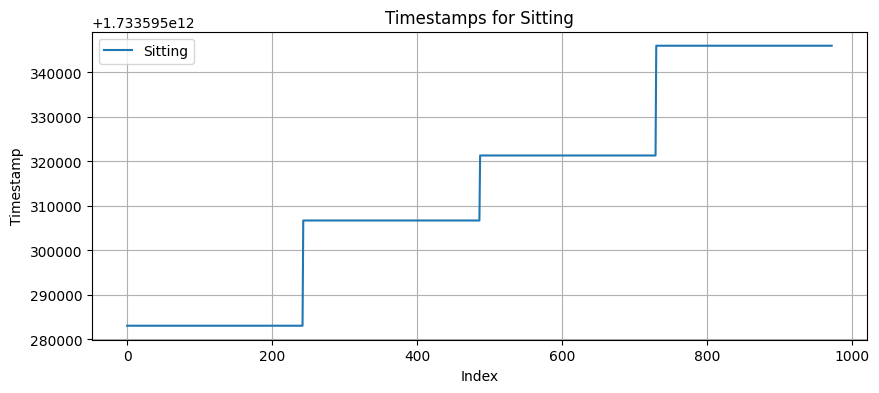

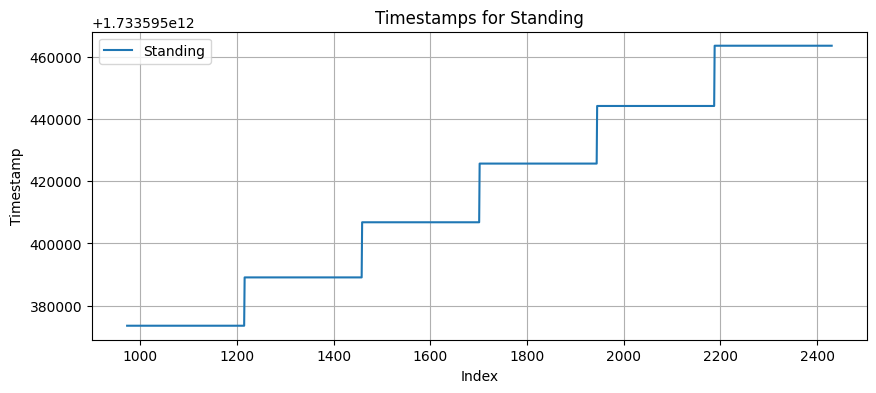

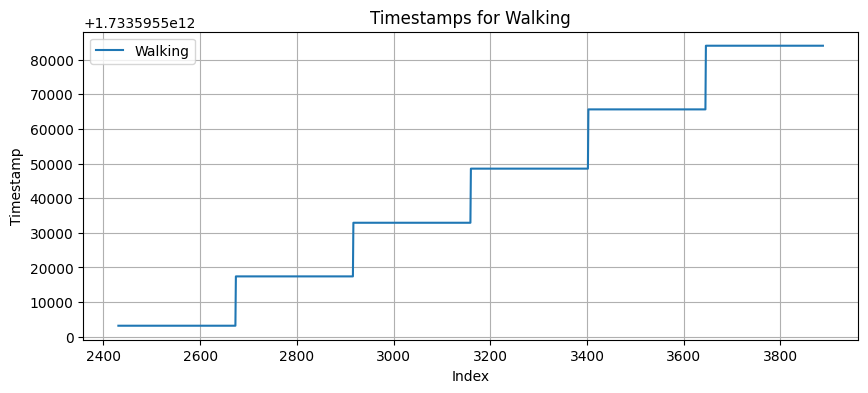

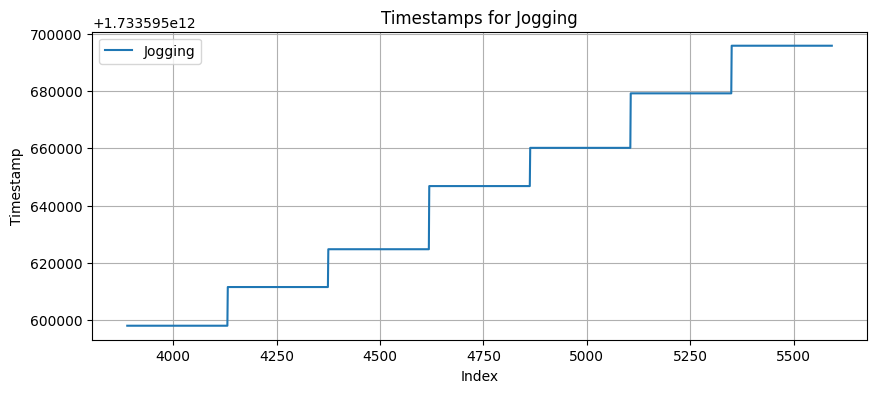

In [6]:
import matplotlib.pyplot as plt

for activity in data['Activity'].unique():
    subset = data[data['Activity'] == activity]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['TimeStamp'], label=activity)
    plt.title(f"Timestamps for {activity}")
    plt.xlabel("Index")
    plt.ylabel("Timestamp")
    plt.legend()
    plt.grid(True)
    plt.show()

In [15]:
print(data['TimeStamp'].head())  # View first few timestamps
print(data['TimeStamp'].dtype)  # Check data type


0    1733595283072
1    1733595283072
2    1733595283072
3    1733595283072
4    1733595283072
Name: TimeStamp, dtype: int64
int64


In [16]:
data['TimeStamp'] = pd.to_numeric(data['TimeStamp'], errors='coerce')  # Ensure numeric
data = data.dropna(subset=['TimeStamp'])  # Drop rows with invalid timestamps


In [19]:
activities = ['Walking', 'Jogging', 'Sitting', 'Standing']
for activity in data['Activity'].unique():
    data_ha = data[data['Activity'] == activity].iloc[:200]
    print(f"{activity} data points: {len(data_ha)}")
    print(data_ha.head())

Sitting data points: 200
  SessionID             DeviseID UserID         Date  Year      TimeStamp  \
0     72-48   RWD9.220429.033.G1     HA   December 7  2024  1733595283072   
1     72-48   RWD9.220429.033.G1     HA   December 7  2024  1733595283072   
2     72-48   RWD9.220429.033.G1     HA   December 7  2024  1733595283072   
3     72-48   RWD9.220429.033.G1     HA   December 7  2024  1733595283072   
4     72-48   RWD9.220429.033.G1     HA   December 7  2024  1733595283072   

          X         Y          Z Activity  
0  1.054043 -1.422958   9.533098  Sitting  
1  1.301982 -0.548581   9.606162  Sitting  
2  1.612206 -1.033681  10.109228  Sitting  
3  1.505604 -1.117525  10.146359  Sitting  
4  1.430144 -1.184600   9.839728  Sitting  
Standing data points: 200
    SessionID             DeviseID UserID         Date  Year      TimeStamp  \
973    583-52   RWD9.220429.033.G1     HA   December 7  2024  1733595373583   
974    583-52   RWD9.220429.033.G1     HA   December 7  2024  17

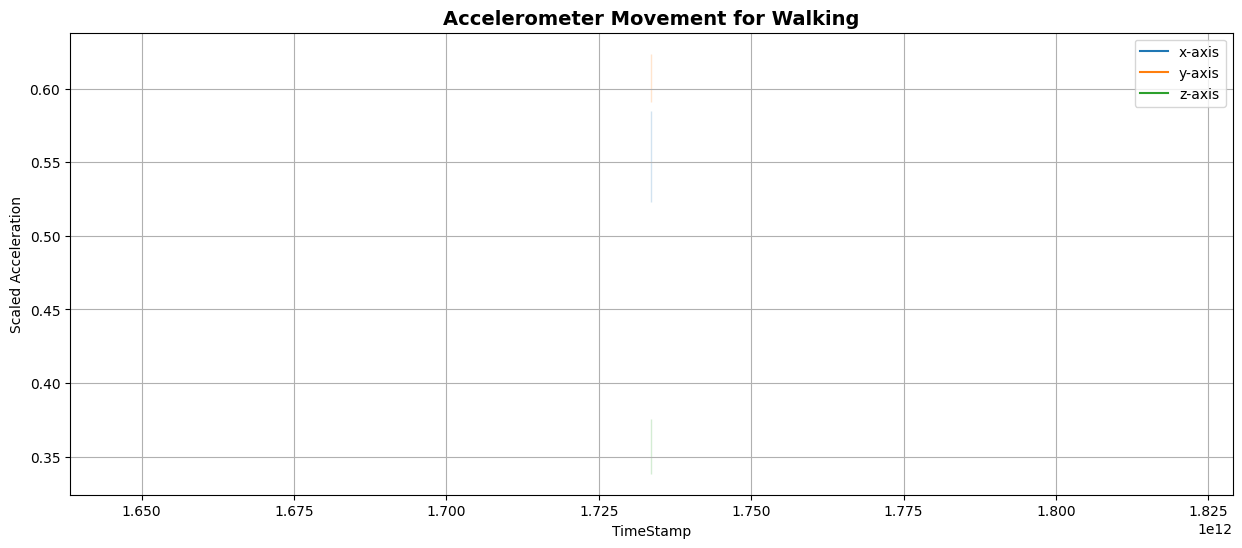

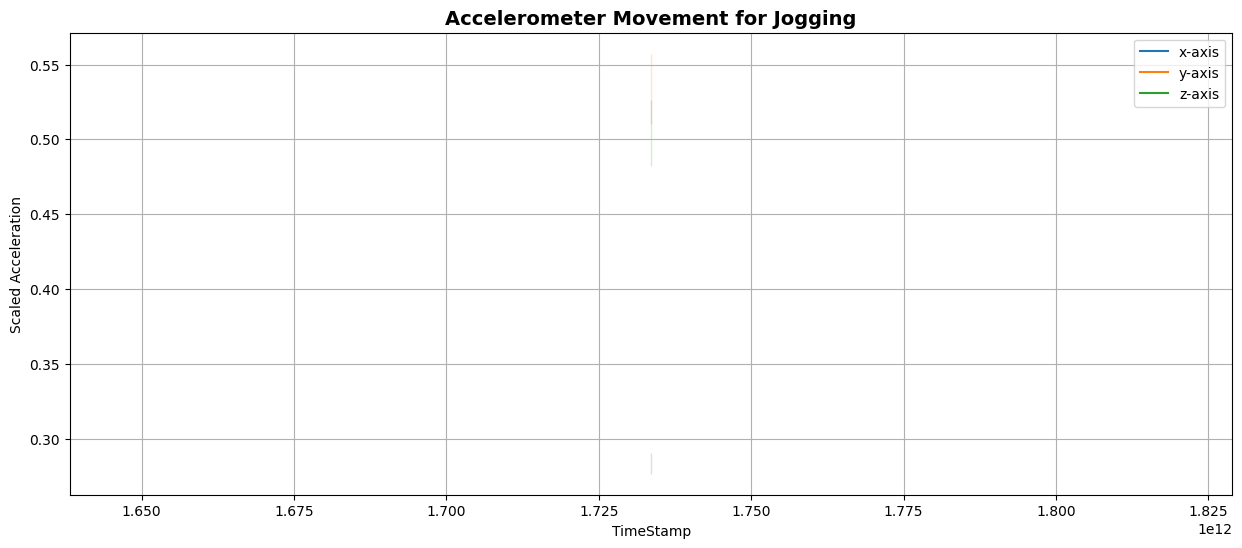

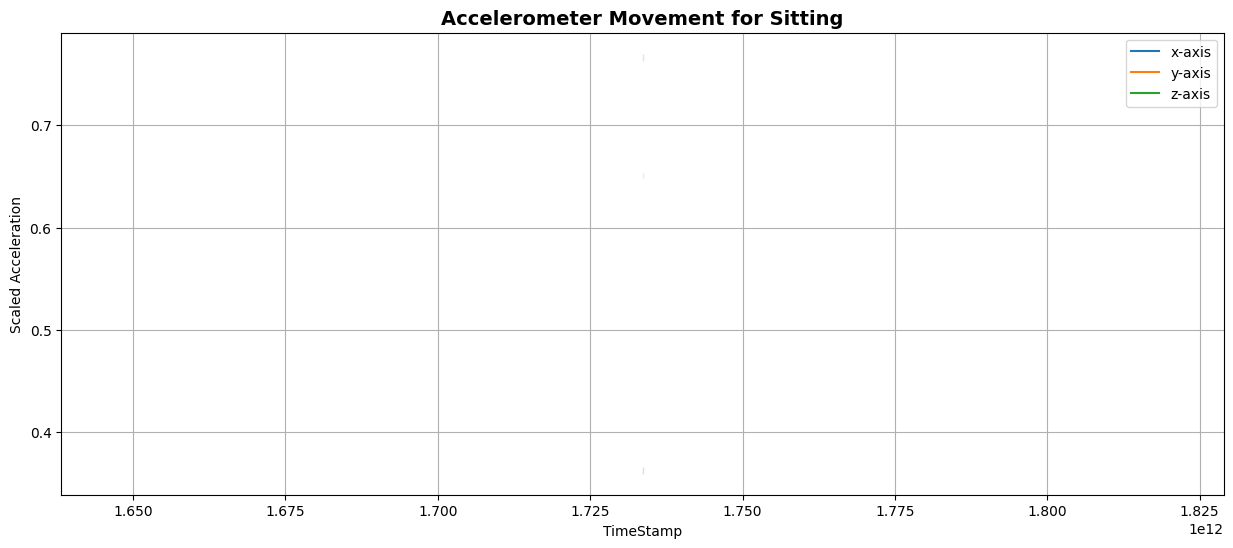

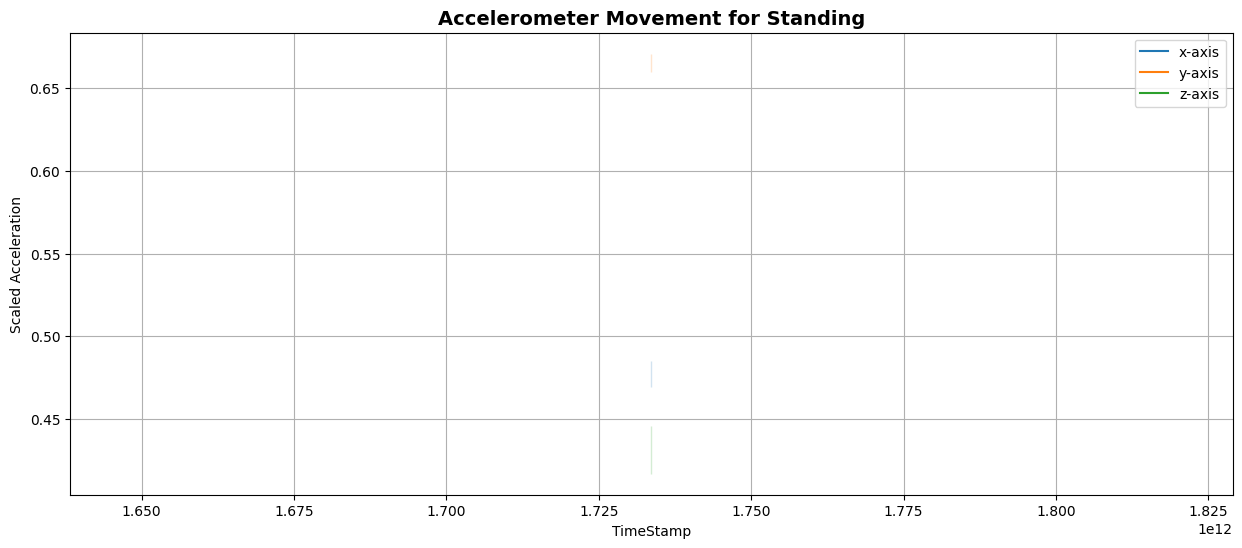

In [24]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the scaler with a narrower range
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on all data (global scaling)
scaler.fit(data[['X', 'Y', 'Z']])

# Activities to visualize
activities = ['Walking', 'Jogging', 'Sitting', 'Standing']

# Loop through each activity
for activity in activities:
    plt.figure(figsize=(15, 6))
    
    # Filter and scale the data for the activity
    data_ha = data[data['Activity'] == activity].iloc[:200].copy()
    data_ha[['X', 'Y', 'Z']] = scaler.transform(data_ha[['X', 'Y', 'Z']])
    
    # Plot the scaled accelerometer data
    sns.lineplot(x='TimeStamp', y='X', data=data_ha, label='x-axis')
    sns.lineplot(x='TimeStamp', y='Y', data=data_ha, label='y-axis')
    sns.lineplot(x='TimeStamp', y='Z', data=data_ha, label='z-axis')
    
    # Add labels and title
    plt.legend()
    plt.ylabel('Scaled Acceleration')
    plt.title(f"Accelerometer Movement for {activity}", fontsize=14, fontweight='bold')
    plt.grid(True)
    plt.show()

